In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from config import api_key
from citipy import citipy
citycsv = r'C:\Users\stave\OneDrive\Desktop\Bootcamp\week 6\Challenge\cities (1).csv'
city_csv = pd.read_csv(citycsv, encoding='utf-8')


In [4]:
lat_range = (-90, 90)
lng_range = (-180, 180)
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

611

In [5]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + 'appid=' + api_key + '&q=' + city
#response = requests.get(query_url)
#response2 = response.json()
#print(response2)

In [6]:
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + 'appid=' + api_key + '&q=' 
    response = requests.get(query_url + city).json()
    
    try:  
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
    except:
        print("City not found. Skip")
    #print(f'Processing record ' + city)



City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not found. Skip
City not foun

In [7]:
city_dict = {
    "City": cities,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
city_data = pd.DataFrame.from_dict(city_dict, orient='index')
city_data.transpose()
#city_data.to_csv(r"C:\Users\stave\OneDrive\Desktop\Bootcamp\week 6\Challenge\WeatherPy\City_Data\city_data.csv")

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.3333,291.94,55,100,4.33,AU,1669256316
1,marsaxlokk,35.8419,14.5431,292.08,81,58,11.73,MT,1669256316
2,cape town,-33.9258,18.4232,288.64,90,86,0.89,ZA,1669256036
3,yellowknife,62.456,-114.3525,265.44,86,100,1.54,CA,1669256318
4,ushuaia,-54.8,-68.3,277.96,81,75,9.77,AR,1669256318
...,...,...,...,...,...,...,...,...,...
606,san juan,None,None,None,None,None,None,None,None
607,westport,None,None,None,None,None,None,None,None
608,la trinidad,None,None,None,None,None,None,None,None
609,kyra,None,None,None,None,None,None,None,None


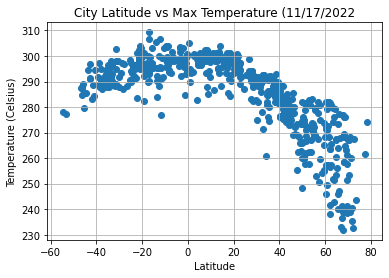

In [8]:
# Build a scatter plot for each data type
x_axis = city_data.transpose()['Latitude']
y_axis = city_data.transpose()['Max Temperature']
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (11/17/2022")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

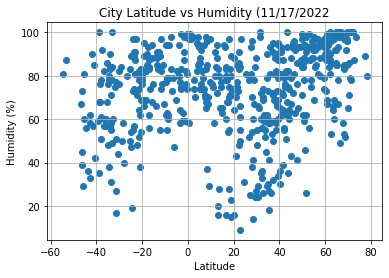

In [9]:
# Build a scatter plot for each data type
x_axis = city_data.transpose()['Latitude']
y_axis = city_data.transpose()['Humidity']
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (11/17/2022")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

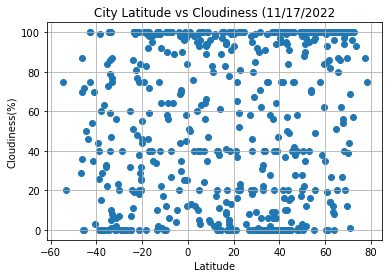

In [10]:
# Build a scatter plot for each data type
x_axis = city_data.transpose()['Latitude']
y_axis = city_data.transpose()['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (11/17/2022")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

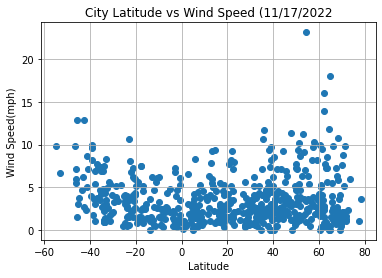

In [11]:
# Build a scatter plot for each data type
x_axis = city_data.transpose()['Latitude']
y_axis = city_data.transpose()['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (11/17/2022")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [12]:
#latall= []
latall = city_data.transpose()
north = latall[latall['Latitude']>0]

print(north)        

               City Latitude Longitude Max Temperature Humidity Cloudiness  \
1        marsaxlokk  35.8419   14.5431          292.08       81         58   
3       yellowknife   62.456 -114.3525          265.44       86        100   
6    cabo san lucas  22.8909 -109.9124          297.32       66         20   
7        osakarovka   50.565   72.5692          259.75       88        100   
8               gat    31.61   34.7642           291.7      100         71   
..              ...      ...       ...             ...      ...        ...   
557       caiaponia  12.7794   45.0367          299.24       72          0   
559           salta  41.1415  -73.3579          281.38       62          0   
560      rio grande   16.455  120.5875          297.03       60         41   
561          dalvik  49.5776  111.9753          262.78       86        100   
562  vestmannaeyjar    42.25      -2.5          275.03       81        100   

    Wind Speed Country        Date  
1        11.73      MT  16

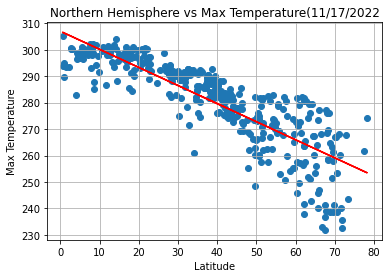

In [13]:
# Build a scatter plot for each data type
x_axis = north['Latitude'].astype(float)
y_axis = north['Max Temperature'].astype(float)
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere vs Max Temperature(11/17/2022")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

#Calculate Line of Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")

# Save the figure
#plt.savefig("TemperatureInWorldNorth.png")

#correlation
correlation = st.pearsonr(x_axis,y_axis)
round(correlation[0], 2)


# Show plot
plt.show()


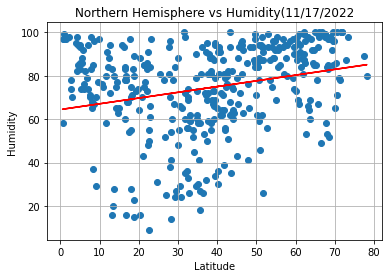

In [14]:
# Build a scatter plot for each data type
x_axis = north['Latitude'].astype(float)
y_axis = north['Humidity'].astype(float)
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere vs Humidity(11/17/2022")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Calculate Line of Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")

# Save the figure
plt.savefig("HumidityInWorldNorth.png")

#correlation
correlation = st.pearsonr(x_axis,y_axis)
round(correlation[0], 2)


# Show plot
plt.show()

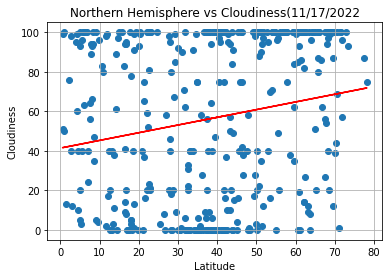

In [15]:
# Build a scatter plot for each data type
x_axis = north['Latitude'].astype(float)
y_axis = north['Cloudiness'].astype(float)
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere vs Cloudiness(11/17/2022")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Calculate Line of Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")

# Save the figure
plt.savefig("CloudinessInWorldNorth.png")

#correlation
correlation = st.pearsonr(x_axis,y_axis)
round(correlation[0], 2)


# Show plot
plt.show()

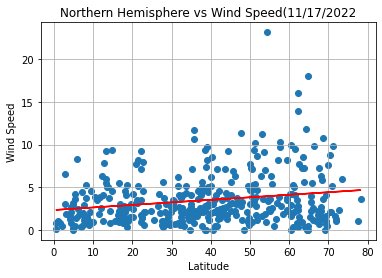

In [16]:
# Build a scatter plot for each data type
x_axis = north['Latitude'].astype(float)
y_axis = north['Wind Speed'].astype(float)
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere vs Wind Speed(11/17/2022")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Calculate Line of Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")

# Save the figure
plt.savefig("WindSpeedInWorldNorth.png")

#correlation
correlation = st.pearsonr(x_axis,y_axis)
round(correlation[0], 2)


# Show plot
plt.show()

In [17]:
#latall= []
latall = city_data.transpose()
south = latall[latall['Latitude']<0]

print(south)  

             City Latitude Longitude Max Temperature Humidity Cloudiness  \
0       busselton   -33.65  115.3333          291.94       55        100   
2       cape town -33.9258   18.4232          288.64       90         86   
4         ushuaia    -54.8     -68.3          277.96       81         75   
5        hermanus -34.4187   19.2345          288.04       80        100   
11         atuona     -9.8 -139.0333           298.6       77         12   
..            ...      ...       ...             ...      ...        ...   
545  batemans bay -15.7667  128.7333          297.14       94         40   
550           ati -27.7951  -64.2615          296.98       40          0   
551     tecoanapa -20.5667  164.2833          301.02       69         32   
556        razole -20.2078   57.7625          297.21       80         44   
558        tidore -31.5375  -68.5364           302.7       17          6   

    Wind Speed Country        Date  
0         4.33      AU  1669256316  
2         0.8

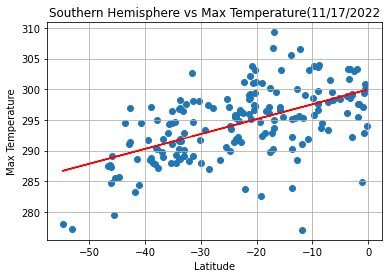

In [18]:
# Build a scatter plot for each data type
x_axis = south['Latitude'].astype(float)
y_axis = south['Max Temperature'].astype(float)
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere vs Max Temperature(11/17/2022")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

#Calculate Line of Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")

# Save the figure
#plt.savefig("TemperatureInWorldSouth.png")

#correlation
correlation = st.pearsonr(x_axis,y_axis)
round(correlation[0], 2)


# Show plot
plt.show()

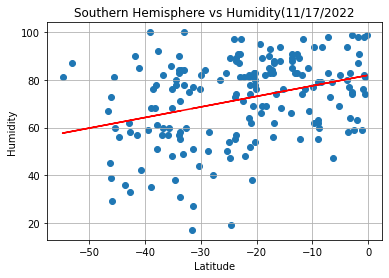

In [20]:
# Build a scatter plot for each data type
x_axis = south['Latitude'].astype(float)
y_axis = south['Humidity'].astype(float)
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere vs Humidity(11/17/2022")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Calculate Line of Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")

# Save the figure
plt.savefig("HumidityInWorldSouth.png")

#correlation
correlation = st.pearsonr(x_axis,y_axis)
round(correlation[0], 2)


# Show plot
plt.show()

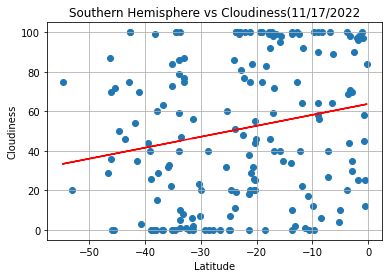

In [21]:
# Build a scatter plot for each data type
x_axis = south['Latitude'].astype(float)
y_axis = south['Cloudiness'].astype(float)
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere vs Cloudiness(11/17/2022")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Calculate Line of Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")

# Save the figure
plt.savefig("CloudinessInWorldSouth.png")

#correlation
correlation = st.pearsonr(x_axis,y_axis)
round(correlation[0], 2)


# Show plot
plt.show()

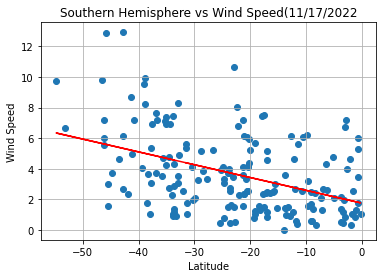

In [22]:
# Build a scatter plot for each data type
x_axis = south['Latitude'].astype(float)
y_axis = south['Wind Speed'].astype(float)
plt.scatter(x_axis, y_axis, marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere vs Wind Speed(11/17/2022")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Calculate Line of Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")

# Save the figure
plt.savefig("WindSpeedInWorldSouth.png")

#correlation
correlation = st.pearsonr(x_axis,y_axis)
round(correlation[0], 2)


# Show plot
plt.show()